In [20]:
!pip install emoji

In [124]:
import pandas as pd
pd.options.display.max_rows=999999
import string
import numpy as np

import re
from emoji import UNICODE_EMOJI
from collections import OrderedDict
import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from datetime import datetime
import time

import warnings
warnings.simplefilter("ignore")

In [94]:
# load file: Sampham_data.csv
df = pd.read_csv('https://raw.githubusercontent.com/githubbinh/Data-Science-thesis-1/main/Sanpham_data_fn.csv', )
df.columns = ['comments', 'rate', 'l1', 'l2', 'l3', 'l4', 'l5', 'label']

In [95]:
df.head(10)

,comments,rate,l1,l2,l3,l4,l5,label
0,"\nGiao đủ , hàng đẹp. Màu hơi khác với hình....",5,2,2,2,0,2,2
1,\nGiao hàng hơi lâu nhưng son đẹp \n,5,0,2,0,0,0,0
2,\nhvihibobof7dugibkb fjdud7s7eigoh xididuaudig...,5,-2,-2,-2,-2,-2,-2
3,\nVì sao anh nhớ em thế này\nThương nhớ đong đ...,5,-2,-2,-2,-2,-2,-2
4,Đóng gói sản phẩm rất đẹp và chắc chắn \nMà...,5,0,0,0,0,0,0
5,"Giao hàng nhanh , đóng gói hàng cẩn thận , ...",5,0,0,0,0,0,0
6,01 màu đỏ tươi nhưng khi lên môi mình thấy l...,3,2,2,1,1,2,2
7,"Chất kem trơn k ăn môi ạ , màu k giống hình :(((",1,1,2,0,1,1,1
8,"Chất lượng sản phẩm tuyệt vời, thời gian giao...",5,0,0,0,0,2,0
9,Chất son ok nhưng Màu thật so với hình khác n...,2,1,1,1,1,1,1


In [96]:
df = df[df['label']!=-2]
df.shape

(12868, 8)

In [97]:
df = df.drop_duplicates()
df.shape

(12513, 8)

## clean data

In [99]:
def punctuation_clean(s):
  s = s.strip()
  s = s.lower()
  for i in s:
    if i in string.punctuation+'\n':
      s = s.replace(i, ' ')
  return s

def merge_same_character(comment):
  word=[]
  for w in comment.split(): 
    character=[]
    for i in range(len(w)):
      if(i==0):
        character.append(w[i])
      else:
        if(w[i]!= character[int(len(character)-1)]):
          character.append(w[i])
    word.append(''.join(character))
  sentence=' '.join(word)
  return sentence

def removeDupWithOrder(s): 
    return "".join(OrderedDict.fromkeys(s))

def fix_emoji(sentence):
  emojis=[]
  a=sentence.split()
  words=[]
  for i in range(len(a)):
    word=[]
    for j in range(len(a[i])):
        if list(a[i])[j] in UNICODE_EMOJI:
          emojis.append(list(a[i])[j])
        else: 
          word.append(list(a[i])[j])
    word_fix=''.join(w for w in word)
    words.append(word_fix)
    while("" in words): 
      words.remove("")
    words_fix=' '.join(w for w in words)
    emoji_fix=''.join(e for e in emojis)
    emoji_fix=removeDupWithOrder(emoji_fix)
    emoji_fix_list=list(emoji_fix)
    emoji_fix=' '.join(e for e in emoji_fix_list)
    if words_fix=='':
      return emoji_fix
  return words_fix+' '+ emoji_fix

In [98]:
s = "son khô môi, nặng môi,với không có quà tặng"
s = punctuation_clean(s)
print(s)
s = remove_duplicate_pharase(s)
print(s)
s = merge_same_character(s)
print(s)
s = fix_emoji(s)
print(s)

son khô môi  nặng môi với không có quà tặng
son khô môi  nặng môi với không có quà tặng
son khô môi nặng môi với không có quà tặng
son khô môi nặng môi với không có quà tặng 


In [100]:
stopwords = []

def make_corpus(df):
  corpus = []
  for sentence in df.comments.loc[:]:
    sentence = sentence.split()
    sentence = " ".join(sentence)
    corpus.append(sentence)
  return corpus

In [101]:
df.isna().sum()

comments    0
rate        8
l1          0
l2          0
l3          0
l4          0
l5          0
label       0
dtype: int64

In [102]:
def data_cleaning(df):
  df.comments = df.comments.apply(punctuation_clean)
  df.comments = df.comments.apply(merge_same_character)
  df.comments = df.comments.apply(fix_emoji)
  df = df.drop_duplicates()
  df.reset_index(drop=True, inplace=True)
  print(df.shape)
  return df

In [104]:
df = data_cleaning(df)

(12305, 8)


In [105]:
corpus = make_corpus(df)

In [106]:
corpus[:10]

['giao đủ hàng đẹp màu hơi khác với hình giao hàng lâu',
 'giao hàng hơi lâu nhưng son đẹp',
 'đóng gói sản phẩm rất đẹp và chắc chắn màu son thích lắm bôi mềm mại',
 'giao hàng nhanh đóng gói hàng cẩn thận màu son lên đẹp đúng màu thanks shop nhiều',
 '01 màu đỏ tươi nhưng khi lên môi mình thấy là đỏ cam nhiều hơn son mềm mịn không khô môi nhưng độ bám màu thì thấp ăn 1 bữa nhẹ là trôi hết thời gian giao hàng nha',
 'chất kem trơn k ăn môi ạ màu k giống hình',
 'chất lượng sản phẩm tuyệt vời thời gian giao hàng nhanh đóng gói sản phẩm tốt',
 'chất son ok nhưng màu thật so với hình khác nhau lắm luôn về son không được',
 'đặt 2 cây giao có 1 cây thiếu hàng nhưng nhắn tin không trả lời shop làm ăn gì kì vậy rồi uy tín đâu mà tin tưởng mua hàng lần 2 vậy mong shop đọc đánh giá em và rep tin nhắn của em',
 'đóng gói sản phẩm tốt màu son lên đẹp shiper cũng nhiệt tình']

In [107]:
words = []
for i in range(len(corpus)):
  a = np.array(corpus)[i].split()
  for j in a:
    words.append(j)
#Đưa vào dataframe để dùng phương thức value_counts():
df_word = pd.DataFrame()
df_word['words'] = words


In [109]:
df_word['words'].value_counts().to_excel('word_list.xlsx')

In [ ]:
df_word['words'].value_counts()

In [126]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S_%d:%m:%y")
print("Current Time =", current_time)
df.to_csv(current_time+'_cleansed_data.csv', index=0)

Current Time = 14:21:21_26:10:20


# Data analysis

## Imbalanced data

           labels  values count
Possitive       0          8683
Neutral         1          2459
Negative        2          1136 



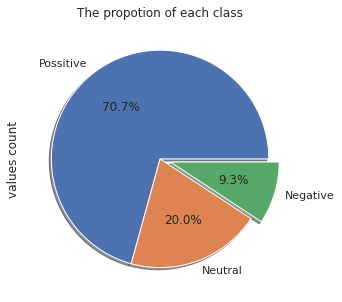

In [ ]:
temp = df["label"].value_counts()
label_df = pd.DataFrame({'labels': temp.index,
                   'values count': temp.values},
                   index=['Possitive', 'Neutral', 'Negative']
                  )
print(label_df,'\n')
plot = label_df.plot.pie(y='values count', title='The propotion of each class',
                         autopct='%1.1f%%', shadow=True, startangle=0,
                         legend=False, explode=(0, 0, 0.1), figsize=(15, 5))
plt.savefig('imbalanced_label.png')

## Length of each comment

In [ ]:
def word_count(s):
  return len(s.split())

In [ ]:
df['length'] = df['comments'].apply(word_count)

In [ ]:
df.head(10)

,comments,rate,l1,l2,l3,l4,l5,label,length
0,giao đủ hàng đẹp màu hơi khác với hình giao hà...,5,2,2,2,0,2,2,12
1,giao hàng hơi lâu nhưng son đẹp,5,0,2,0,0,0,0,7
2,đóng gói sản phẩm rất đẹp và chắc chắn màu son...,5,0,0,0,0,0,0,16
3,giao hàng nhanh đóng gói hàng cẩn thận màu son...,5,0,0,0,0,0,0,17
4,01 màu đỏ tươi nhưng khi lên môi mình thấy là ...,3,2,2,1,1,2,2,39
5,chất kem trơn k ăn môi ạ màu k giống hình,1,1,2,0,1,1,1,11
6,chất lượng sản phẩm tốt,5,0,0,0,0,2,0,5
7,chất son ok nhưng màu thật so với hình khác nh...,2,1,1,1,1,1,1,17
8,đặt 2 cây giao có 1 cây thiếu hàng nhưng nhắn ...,1,1,1,1,1,1,1,45
9,đóng gói sản phẩm tốt màu son lên đẹp shiper c...,5,0,0,0,0,0,0,13


In [ ]:
len_counts = dict(df['length'].value_counts())
for k, v in len_counts.items():
  if v==max(len_counts.values()):
    print('Common length of a comment: ', k)

Common length of a comment:  15


In [ ]:
trans_df = df[['comments', 'length']].copy()
trans_df = trans_df.set_index('comments').T
a_dictionary = trans_df.to_dict('list')

In [ ]:
print('Longest comments: ')
for k, v in a_dictionary.items():
  if v==max(a_dictionary.values()):
    print(f'\t{k}: {v[0]}')
    
print('Shortest comments: ')
for k, v in a_dictionary.items():
  if v==min(a_dictionary.values()):
    print(f'\t{k}: {v[0]}')

Longest comments: 
	chắc ở đây chỉ có mình nhận xét ko tốt mà cũng chỉ là cảm nhận cá nhân mình thôi nheson ghi là hương trà xanh mà chỉ toàn mùi dầu dừamới đầu tô lên hơi mát mát chừng 1 xíu rồi hếtson ko phù hợp tô vào buổi tối và nằm máy lạnh vì nó khô lắmson ko gây bóng lắm nhưng tô một hồi là có cảm giác khô kinh khủnglúc tô cũng ko mướt môi gì cảđược cái bao bì và dịch vụ giao hàng siêu nhanh của tiki : 92
Shortest comments: 
	🥰: 1
	❤: 1
	🌟: 1
	👌: 1
	👍: 1
	💓: 1
	💜: 1
	💝: 1
	🤗: 1
	😁: 1
	😍: 1
	😚: 1
	🙂: 1
	best : 1
	chán : 1
	đẹp : 1
	đep : 1
	đẹpo : 1
	đẹpôpopop : 1
	dep : 1
	đỉnh : 1
	dinkout : 1
	dở : 1
	được : 1
	fake : 1
	god : 1
	godfd : 1
	godfdfdfd : 1
	gud : 1
	hihi : 1
	hịn : 1
	like : 1
	mê : 1
	naixu : 1
	ngon : 1
	nice : 1
	ok : 1
	oke : 1
	okela : 1
	oki : 1
	okiokioki : 1
	okdhdbdbdbsbdhdhdhdhdhdhdhdhdhdhdhdhdhdhđhdhđhdhd : 1
	okik : 1
	okjkjk : 1
	okikik : 1
	okm : 1
	oklk : 1
	oknbvhbvbnjhbnjhgbnjn : 1
	okokokokokokokokokokokokokokokokokokokokokokokokokokokmo : 1
	ổ

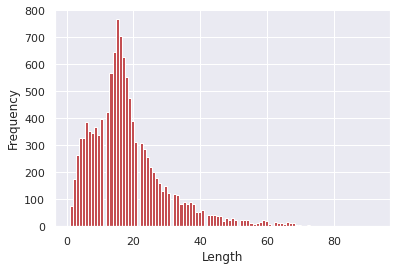

In [ ]:
df.length.plot(bins=100, kind='hist', color='r')
plt.xlabel('Length')
plt.show()

## Wordcloud of possitive comments

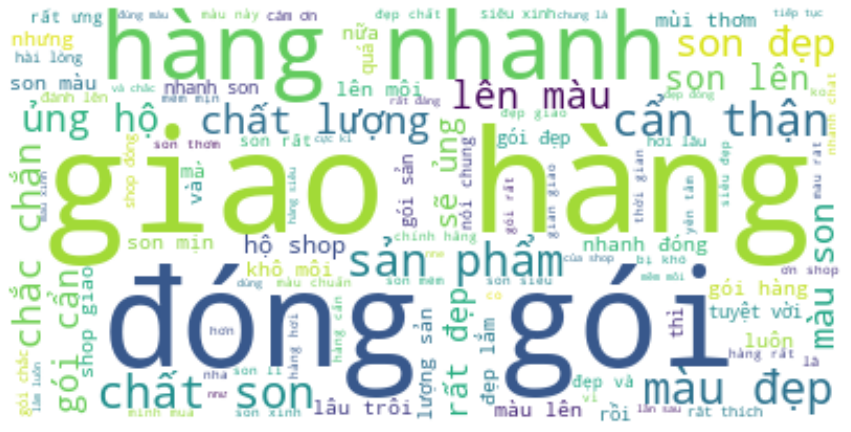

In [ ]:
from wordcloud import WordCloud

sentences = df[df['label']==0].comments.to_list()
sentences_as_one_string = " ".join(sentences)


wordCloud = WordCloud(max_words=100, background_color="white").generate(sentences_as_one_string)
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off');

## Wordcloud of negative comments

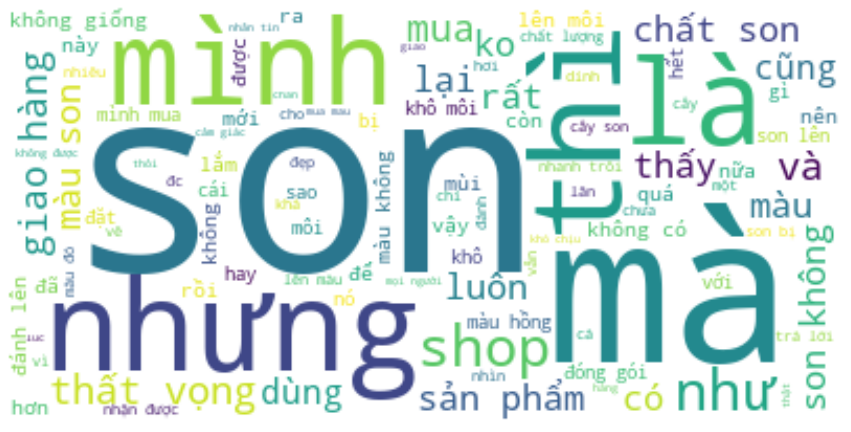

In [ ]:
sentences = df[df['label']==1].comments.to_list()
sentences_as_one_string = " ".join(sentences)


wordCloud = WordCloud(max_words=100, background_color="white").generate(sentences_as_one_string)
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off');

## Wordcloud of negative comments

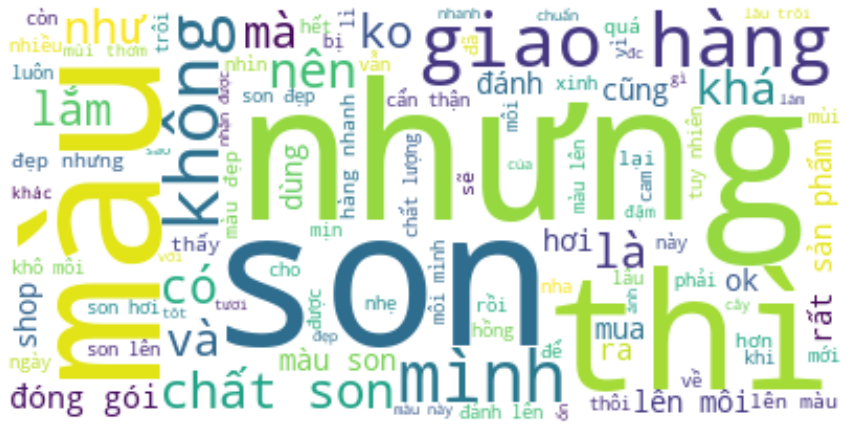

In [ ]:
sentences = df[df['label']==2].comments.to_list()
sentences_as_one_string = " ".join(sentences)


wordCloud = WordCloud(max_words=100, background_color="white").generate(sentences_as_one_string)
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off');

# Modeling

## Word2vec

In [ ]:
from nltk import ngrams, bigrams
from gensim.models import Word2Vec

In [ ]:
def word_grams(words, n=1):
    s = []
    for ngram in ngrams(words, n):
        s.append(' '.join(str(i).lower() for i in ngram))
    return s
def grams_type(df, n=1):
    df[str(n)+'gram'] = np.nan
    for i in range(len(df.comments)):
        df[str(n)+'gram'][i] = word_grams(str(df.comments[i]).split(), n)
    return df[str(n)+'gram']

In [ ]:
# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return text.encode('ascii', 'ignore').decode('ascii')
# text = u'This is a smiley face \U0001f602'
# print(text) # with emoji
# print(deEmojify(text))
# print(text) # with emoji

In [ ]:
# df['comments'] = df.comments.apply(deEmojify)

In [ ]:
df['comments'].isna().sum()

0

In [ ]:
df.head(10)

,comments,rate,l1,l2,l3,l4,l5,label
0,giao đủ hàng đẹp màu hơi khác với hình giao hà...,5,2,2,2,0,2,2
1,giao hàng hơi lâu nhưng son đẹp,5,0,2,0,0,0,0
2,đóng gói sản phẩm rất đẹp và chắc chắn màu son...,5,0,0,0,0,0,0
3,giao hàng nhanh đóng gói hàng cẩn thận màu son...,5,0,0,0,0,0,0
4,01 màu đỏ tươi nhưng khi lên môi mình thấy là ...,3,2,2,1,1,2,2
5,chất kem trơn k ăn môi ạ màu k giống hình,1,1,2,0,1,1,1
6,chất lượng sản phẩm tốt,5,0,0,0,0,2,0
7,chất son ok nhưng màu thật so với hình khác nh...,2,1,1,1,1,1,1
8,đặt 2 cây giao có 1 cây thiếu hàng nhưng nhắn ...,1,1,1,1,1,1,1
9,đóng gói sản phẩm tốt màu son lên đẹp shiper c...,5,0,0,0,0,0,0


In [ ]:
df['1gram'] = grams_type(df, 1)
df['2gram'] = grams_type(df, 2)

In [ ]:
df["context"] = df["1gram"] + df["2gram"]
df.head(10)

,comments,rate,l1,l2,l3,l4,l5,label,1gram,2gram,context
0,giao đủ hàng đẹp màu hơi khác với hình giao hà...,5,2,2,2,0,2,2,"[giao, đủ, hàng, đẹp, màu, hơi, khác, với, hìn...","[giao đủ, đủ hàng, hàng đẹp, đẹp màu, màu hơi,...","[giao, đủ, hàng, đẹp, màu, hơi, khác, với, hìn..."
1,giao hàng hơi lâu nhưng son đẹp,5,0,2,0,0,0,0,"[giao, hàng, hơi, lâu, nhưng, son, đẹp]","[giao hàng, hàng hơi, hơi lâu, lâu nhưng, nhưn...","[giao, hàng, hơi, lâu, nhưng, son, đẹp, giao h..."
2,đóng gói sản phẩm rất đẹp và chắc chắn màu son...,5,0,0,0,0,0,0,"[đóng, gói, sản, phẩm, rất, đẹp, và, chắc, chắ...","[đóng gói, gói sản, sản phẩm, phẩm rất, rất đẹ...","[đóng, gói, sản, phẩm, rất, đẹp, và, chắc, chắ..."
3,giao hàng nhanh đóng gói hàng cẩn thận màu son...,5,0,0,0,0,0,0,"[giao, hàng, nhanh, đóng, gói, hàng, cẩn, thận...","[giao hàng, hàng nhanh, nhanh đóng, đóng gói, ...","[giao, hàng, nhanh, đóng, gói, hàng, cẩn, thận..."
4,01 màu đỏ tươi nhưng khi lên môi mình thấy là ...,3,2,2,1,1,2,2,"[01, màu, đỏ, tươi, nhưng, khi, lên, môi, mình...","[01 màu, màu đỏ, đỏ tươi, tươi nhưng, nhưng kh...","[01, màu, đỏ, tươi, nhưng, khi, lên, môi, mình..."
5,chất kem trơn k ăn môi ạ màu k giống hình,1,1,2,0,1,1,1,"[chất, kem, trơn, k, ăn, môi, ạ, màu, k, giống...","[chất kem, kem trơn, trơn k, k ăn, ăn môi, môi...","[chất, kem, trơn, k, ăn, môi, ạ, màu, k, giống..."
6,chất lượng sản phẩm tốt,5,0,0,0,0,2,0,"[chất, lượng, sản, phẩm, tốt]","[chất lượng, lượng sản, sản phẩm, phẩm tốt]","[chất, lượng, sản, phẩm, tốt, chất lượng, lượn..."
7,chất son ok nhưng màu thật so với hình khác nh...,2,1,1,1,1,1,1,"[chất, son, ok, nhưng, màu, thật, so, với, hìn...","[chất son, son ok, ok nhưng, nhưng màu, màu th...","[chất, son, ok, nhưng, màu, thật, so, với, hìn..."
8,đặt 2 cây giao có 1 cây thiếu hàng nhưng nhắn ...,1,1,1,1,1,1,1,"[đặt, 2, cây, giao, có, 1, cây, thiếu, hàng, n...","[đặt 2, 2 cây, cây giao, giao có, có 1, 1 cây,...","[đặt, 2, cây, giao, có, 1, cây, thiếu, hàng, n..."
9,đóng gói sản phẩm tốt màu son lên đẹp shiper c...,5,0,0,0,0,0,0,"[đóng, gói, sản, phẩm, tốt, màu, son, lên, đẹp...","[đóng gói, gói sản, sản phẩm, phẩm tốt, tốt mà...","[đóng, gói, sản, phẩm, tốt, màu, son, lên, đẹp..."


In [ ]:
train_data = df.context.tolist()
len(train_data)

12278

In [ ]:
model = Word2Vec(train_data, size=100, window=5, min_count=3, workers=4, sg=1)

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=0,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
w2v_model.build_vocab(train_data, progress_per=12288)
w2v_model.wv.vocab
model.wv.vocab

In [ ]:
model.wv.similar_by_word('son đẹp')

[('màu đẹp', 0.7493143677711487),
 ('hàng đẹp', 0.6995323300361633),
 ('chất đẹp', 0.6846107244491577),
 ('gói đẹp', 0.6834046840667725),
 ('son xinh', 0.6828210353851318),
 ('lên đẹp', 0.6748118996620178),
 ('hộp đẹp', 0.66930091381073),
 ('son chất', 0.6637384295463562),
 ('son chuẩn', 0.6622081995010376),
 ('thơm đẹp', 0.6508033871650696)]

## Tokenize

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(df):
  df_pos = df[df['label']==0]
  df_pos = df.loc[:999]

  df_neg = df[df['label']==1]
  df_neg = df.loc[:999]

  df_neutral = df[df['label']==2]
  df_neutral = df.loc[:999]
  
  df_balanced = pd.concat([df_pos, df_neg, df_neutral])
  df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

  # X = df_balanced['comments']
  # y = df_balanced['label']
  return df_balanced

data = load_data(df)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X.shape)
# print(y.shape)
data = data[['comments', 'label', 'context']]
data.head()

,comments,label,context
0,chất son lên môi rất đẹp 😊,0,"[chất, son, lên, môi, rất, đẹp, 😊, chất son, s..."
1,chất lượng sản phẩm tuyệt vời đóng gói cẩn thậ...,0,"[chất, lượng, sản, phẩm, tuyệt, vời, đóng, gói..."
2,chời ơi giao hàq ts chất lượng sp ch khui hộp ...,0,"[chời, ơi, giao, hàq, ts, chất, lượng, sp, ch,..."
3,chất lượng sp tuyệt vời mẫu mã đẹpđóng gói sp ...,0,"[chất, lượng, sp, tuyệt, vời, mẫu, mã, đẹpđóng..."
4,bao bì nhìn chắc chắn xịn sò son lên màu đẹptu...,2,"[bao, bì, nhìn, chắc, chắn, xịn, sò, son, lên,..."


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# from gensim.utils import simple_preprocess
# # Tokenize the text column to get the new column 'tokenized_text'
# data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data['comments']] 
# data['tokenized_text'].head(10)

# from nltk.tokenize import word_tokenize

# def tokenized_word(df):
#   tokenized_list = []
#   for i in range(len(df)):
#     tokenized_word = word_tokenize(df.comments[i])
#     tokenized_list.append(tokenized_word)
#   return tokenized_list

# def token_col(df):
#     df['tokenized_text'] = np.nan
#     token_list = tokenized_word(df)
#     for i in range(len(df.comments)):
#         df['tokenized_text'][i] = token_list[i]
#     return df['tokenized_text']

In [ ]:
# from gensim.parsing.porter import PorterStemmer
# porter_stemmer = PorterStemmer()
# # Get the stemmed_tokens
# data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['tokenized_text'] ]
# data['stemmed_tokens'].head(10)

# data['tokenized_text'] = token_col(data)
# data.head()

,comments,label,tokenized_text
0,chất lượng sản phẩm đã dùng rồi mất thời gian ...,1,"[chất, lượng, sản, phẩm, đã, dùng, rồi, mất, t..."
1,bảo son lì có lì đâu màu k đẹp nữa,1,"[bảo, son, lì, có, lì, đâu, màu, k, đẹp, nữa]"
2,chất lượng sản phẩm tuyệt vời,0,"[chất, lượng, sản, phẩm, tuyệt, vời]"
3,01 giống hồng đào khá là đẹp chưa dung nên cũn...,0,"[01, giống, hồng, đào, khá, là, đẹp, chưa, dun..."
4,chất lượng sản phẩm tốt giao hàng nhanh,0,"[chất, lượng, sản, phẩm, tốt, giao, hàng, nhanh]"


In [ ]:
data[['comments', 'context']].head(10)

,comments,context
0,chất son lên môi rất đẹp 😊,"[chất, son, lên, môi, rất, đẹp, 😊, chất son, s..."
1,chất lượng sản phẩm tuyệt vời đóng gói cẩn thậ...,"[chất, lượng, sản, phẩm, tuyệt, vời, đóng, gói..."
2,chời ơi giao hàq ts chất lượng sp ch khui hộp ...,"[chời, ơi, giao, hàq, ts, chất, lượng, sp, ch,..."
3,chất lượng sp tuyệt vời mẫu mã đẹpđóng gói sp ...,"[chất, lượng, sp, tuyệt, vời, mẫu, mã, đẹpđóng..."
4,bao bì nhìn chắc chắn xịn sò son lên màu đẹptu...,"[bao, bì, nhìn, chắc, chắn, xịn, sò, son, lên,..."
5,️️️️️️️️️️️️️️️️️️ ♥ 👌 🏻,"[️️️️️️️️️️️️️️️️️️, ♥, 👌, 🏻, ️️️️️️️️️️️️️️️️..."
6,bất ngờ được nhận túi tote cực cute mình dùng ...,"[bất, ngờ, được, nhận, túi, tote, cực, cute, m..."
7,bảng màu không đúng như mô tả nói màu 24 đỏ ca...,"[bảng, màu, không, đúng, như, mô, tả, nói, màu..."
8,cảm giác bết màu son lì khi tô,"[cảm, giác, bết, màu, son, lì, khi, tô, cảm gi..."
9,chất lượng sản phẩm tốt giao hàng nhanh,"[chất, lượng, sản, phẩm, tốt, giao, hàng, nhan..."


In [ ]:
data.columns

Index(['comments', 'label', 'context'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(df, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df[['comments', 'context']], 
                                                        df['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(data)

Value counts for Train sentiments
0    1486
1     431
2     183
Name: label, dtype: int64
Value counts for Test sentiments
0    626
1    193
2     81
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  ...                                            context
0   2902  ...  [chất, mịn, vì, là, cacao, nên, khô, hơn, các,...
1   2393  ...  [chất, lượng, sản, phẩm, tuyệt, vời, mua, bao,...
2    700  ...  [bao, bì, đẹp, vỏ, son, màu, xanh, nhìn, mê, l...
3   2079  ...  [canh, mua, có, tặng, kèm, nên, cố, tình, chỉn...
4   2309  ...  [chất, đẹp, nhưng, mùi, giống, son, giả, hơi, ...

[5 rows x 3 columns]


In [ ]:
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

# word2vec_model_file = OUTPUT_FOLDER + 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(data['context']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time), 's')
# w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 8.447700023651123  s


In [ ]:
print("Index of the word 'son đẹp':")
print(w2v_model.wv.vocab['son đẹp'].index)
# Total number of the words 
print(len(w2v_model.wv.vocab))
# Print the size of the word2vec vector for one word
print("Length of the vector generated for a word")
print(len(w2v_model['son đẹp']))
# Get the mean for the vectors for an example review
# print("Print the length after taking average of all word vectors in a sentence:")
# print(np.mean([w2v_model[token] for token in df['stemmed_tokens'][0]], axis=0))

Index of the word 'son đẹp':
68
10529
Length of the vector generated for a word
1000


In [ ]:
# Store the vectors for train data in following file
word2vec_filename = 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model[token] for token in row['context']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
# Load from the filename
word2vec_df = pd.read_csv(word2vec_filename)
#Initialize the model
logreg = LogisticRegression()

start_time = time.time()
# Fit the model
logreg.fit(word2vec_df, Y_train['label'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time), 's')

Time taken to fit the model with word2vec vectors: 1.3155817985534668  s


In [ ]:
from sklearn.metrics import classification_report
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([w2v_model[token] for token in row['context']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(1000)]))
test_predictions_word2vec = logreg.predict(test_features_word2vec)
print(classification_report(Y_test['label'],test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       626
           1       0.00      0.00      0.00       193
           2       0.00      0.00      0.00        81

    accuracy                           0.70       900
   macro avg       0.23      0.33      0.27       900
weighted avg       0.48      0.70      0.57       900



# test

In [ ]:
# df.to_csv('datafull.csv', index=0)

In [ ]:
# df.comment.to_csv('comment.txt', index=0)

In [ ]:
# txt = pd.read_csv('/content/comment.txt')
txt

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer


# def load_data(txt_file):
#     """
#     Each document is one line, documents is already preprocess like: remove truncate, tokenize, strip, ...
#     :param txt_file: path/to/text/file
#     :return: list of documents
#     """
#     texts = []
#     with open(txt_file, 'r', encoding='utf8') as fp:
#         for line in fp.readlines():
#             texts.append(line.strip())
#     return texts


# def get_stopwords(documents, threshold=3):
#     """
#     :param documents: list of documents
#     :param threshold:
#     :return: list of words has idf <= threshold
#     """
#     tfidf = TfidfVectorizer(min_df=100)
#     tfidf_matrix = tfidf.fit_transform(documents)
#     features = tfidf.get_feature_names()
#     stopwords = []
#     print(min(tfidf.idf_), max(tfidf.idf_), len(features))
#     for index, feature in enumerate(features):
#         if tfidf.idf_[index] <= threshold:
#             stopwords.append(feature)
#     return stopwords


# if __name__ == '__main__':
#     docs = load_data(r"/content/comment.txt")
#     stopwords = get_stopwords(docs, threshold=4)
#     with open('stopwords.txt', 'w', encoding='utf8') as fp:
#         for word in stopwords:
#             fp.write(word + '\n')

In [ ]:
# stopwords = pd.read_csv('/content/stopwords.txt')
# pd.options.display.max_rows=100
# stopwords

In [ ]:
# from collections import OrderedDict
# def remove_duplicate(str1):
#   return "".join(OrderedDict.fromkeys(str1))
     
# print(remove_duplicate("xinhhhhhhhhhhhhhhhh"))
# print(remove_duplicate("w3resource"))

In [ ]:
# words_filter_list = ['cm0105', 'tcvn', 'hêhhihihaha', 'andmdkdkkfkdkdmdkfdkdkfkfjffnfkfkfkf', 'hxhxhcjfjcjch', '4g', 'hhhhhhhhhhhhhhhhjjjhhjjjjjjjjhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhjhjjjjjhhhhjjjjjjjjjjjjj',
#                       'kkkkkkkkllkkkkkkkkkkkkkkkkkkkkkk', 'f', 'hándndidndjdjdbjdndjdjdndndndndndjdjdjdnfb', 'lrmvkkrk', '2382022', '2544=84=4855=85485555588855',
#                       '🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡🐡', 'hnamskj', 'kfmmfkcjkckdkkfmfvorlfplvllvrlnjkrv', 'ndjsjndjkskjsjjdhhsjksmkdknfnjdj',
#                       '₫₫₫‘snnbdhdbsbdhsjnzhdnsbdbdbdbbsbdbdbd', 'gjknmkigfdddfghoohbbkkvdfghhgvghhhjoo', 'njhjnkjnkjahscjknkjdfnjhfj',
#                       '🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊', 'ajwbsuwbswjshyeiwnwusbsjsjsbsbdjsjanaidbdhdhdbdbbdndjdisjsnsjsnsjsjnskaiansnisbwbdidbdhysbksnshxfbajsiwkwnwnwjnwjwjw',
#                       'jndkdndjsnsj', 'iaiaiaiaisbsie8wnesu8wiwbajwownshijz', 'sonxkbfnskkxjxibslxncónsbcksjskcfnndnxjd', 'hihieekkzkzkzkzkzkzkkzkzkzkzkkzjzjzjznznznzznnzzn',
#                       'vvvvvvvvvvvvvvvvvvvvvvvvv', 'zzzzzzzzzzzzzzzzzzzzzz', 'dnndndjdndjdndndndndndndndndjkckckxkdkxkxkxkxkxkxkkx', '84849909883888',
#                       'kcjdjshsnshwhuwhdhhsueuwi', 'gshidoodgsggsjdkxgdhdkkdgdbvsvajhdhdghd', 'svssvxbsbzbsbsb', 'cjdjdjdnđjdjdjdjdjdjdjdjdjêjsjeddjdndj',
#                       'vhhehshhshshsbsbshshshsbbsbdbdbdbdbbd', 'ksjxkskckskckdkoxxokckdkxdocodkdkcodkdkfckksfkkcfkfk', 'jejsnđóppldkdjxnxjxjiidỗdjxnxnxjkxõkxkxjxjjxjxjxjxjxj',
#                       'nnnnnnnnnnnnnnnnnnnnnjjjjjjjjjjjjjj', 'sksndjjdnjsbjjdjshqhdhdihwihidhsubeuhebebeheh', 'cnxnsmsncnmz', 'iiiiiiiiiiiii', 'nnnn',
#                       'bgdhgdgc', 'mkmkmkkkkkkkk', 'ppppppppppppppppppppppppppopppppppppppppppppppppppplppplplllllllllpppppppppppppppppppppp',
#                       'owirniejdkxiwndnei', 'jsjsjsji', 'jdndjd', 'nsosoqjdhjqonxhsjjjxhojdnwnjwksbbsbxjzbbwbebdnakkkwjwnwn', 'hjjvdgghjhxxhjjhssdhjhvcgjkhghhhhjhgcygghvvv',
#                       'dddddddwewgrgreegeggrbgbrgrghrgrrg', 'bsnshksbskdbsnmsmsbsksmsbssskshvsmsksgsvxhzh', 'ghjhgygddxxzxxx', 'nakajagsvsijabsvsgahshhsdvhđhdbdjdjdj',
#                       'kjhhjusidhjhcbebbbcji', 'vnhgtrxvbnjgrđc', 'hsjsjjdjskskskkskskskskskskksisisjsjjsjsjsj', 'gggggghhhhhhhhhhhhhhhhhhhhh',
#                       'bhxhdududhdbdbhdhxuudhdhehehehevejuuxiucucuchxhxyxyx', 'nynsnyndjdkdldldld', 'nsjndndnxnsndbnsnbdbdbbsnsbbsbdb', 'wodjckeidixj', 
#                       'ggghhjjjjjkkkkkkjjbhhjjjjjjjkkkkjhhjjjkkkkkkjjj', 'hdkdbejdjbdjdidhhsishsbsihsvekshehbskshsbjsshbsiebeiehshjsbsusjksjwvwowhwvwiiwhwuwiwonsbvskosowhwhwjakj',
#                       'jjnjjjjnjjjjjjjjjjjjj', 'bcjxưkdnjxjdjdbjdkưbdibjeksbxõhdbdj', 'zuzzizksjihhu','jwejjejdjdk', '₫₫’cvhdhjnbgbvhbjvchjvg',
#                       'xjxjnxnxnxnxnxnxnxnxxnn', 'bdbxbdbdbdbbdbdbdbdbdbdxhhxhddhxhhhh', 'gdudbjrhh', 'jhcchjjjjjjhhhgggggvvgggggg', 'dhnibeudjcnshjcjakhdjdhsbcknagxkbhxbdnxjncnjcncjjsncjdnhcnisnhjcjvknxnjjj',
#                       'dnhdnskndndjsnendndndnsndnkwnwnwnsnsnsn', 'shdbdkjssdhdhdjdhhhvdvdbdndnnxbdjd', 'hdgsjsvcjsisbsisocnxjdisjdjdjsjwjwjwjwj', 'abcdxyztghiklmnopqt',
#                       'jgcgjkkghkb', 'hhajakajabsvsjsosoabsbb', 'dgkohswryhvxsjkpydvjkigdsxqwryiohssxxbmkkirwshcxvnkphrwtuonvđthkgghb', 'wisirnziwiwo',
#                       'snkqjbwakjzbwjaijwbebkskxkc', 'kskxkxkxkxkxkxkkcjcjcjcjcjcic', 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#                       'jxkdbjxjx', 'jmdmvj', 'njjjsjsjksennejejenehsjsjsnsjjj', 'ndndnbnrbrbnndndkdkkekekeejdjdjsjsjsnsjskskskssmndncndnjskwkendndnbnrbrbnndndkdkkekekeejdjdjsjsjsnsjskskskssmndncndnjskwk',
#                       'sjsjsjsj', 'gdhdhhdhdbxbhj', 'jahsbhx', 'hjghjhcg', 'hjajj', 'jvckbvbh', 'hdhhdhdhdjjd', 'ntjsjababcndjdkdjgkcnxskanlosjxnkdoskdncjkđjcnkkokovgkogookgkgkgkk',
#                       'nvkvlcklkdoskwbjvksjja', 'ndkcjbdkkabk', 'jkskk', 'ndndndjdjdjdjjdjdjdndndnbxdndnndnxndndndndnnxndndnxndndnxndndndn', 'ghgdxhsxgjvdhbxbdhcz',
#                       'vggggggghhyge', 'jjgjkmhgbnk', 'djsnsjsnsjnsjsndjdkjdkjxjdjjdjsjsndjdjndjdndkdnbdbdhshbhgghjkkjjhgskdjdbdjdnjđn', 'vvdshrssrtttrrdsssseyugetugssryhgghh',
#                       'ksjxkskckskckdkoxxokckdkxdocodkdkcodkdkckkskkckk', 'zzzzzzzzzz', 'drhrjjhghyssascvnkjklkrewdb', 'jsjn', 'hjimbjwbbdkejvdjir',
#                       'jdndjjdjdjjaanhdjsjsndnxx', 'jsjjauahwjwidjsjdbdbsj', 'hsnsuanaavoabshskabausnzvhakavhkabsgzianb', 'hojhoogjchchghjggjjhhkgjcjhchchhhhjggkgkgkjgjgjjggkchgzgxbcjvkbkhihtdtrseadzgchvhkljojygddzgcjkbjliit5e4wt6988090oguhv',
#                       'yyygggvbbghjijbvvv', 'skkxndjkx', 'sjsjjssjhshsshsh', 'ndndnbfnrbrbnfndndkdkekekejdjdjsjsjsnsjsksksksmndncndnjskwke ndndnbfnrbrbnfndndkdkekekejdjdjsjsjsnsjsksksksmndncndnjskwke',
#                        'kskdmdlcn fjkdndkrjncn skxndjkx sklanfjcnf fkd énkmsnkanf jxkdbjxjx kdnskabdjn ndkdnd ksba cjks ncisnskjc ksbxjd ndkcjbdkabk nkdb fj c eka sj',
#                        'nynsnyndjdkdldldld hdjdjdjdkd', 'owirnfiejdkxiwndnei eiejdneixjd wisirnziwiwo eowoxknfoe wodjckeidixj ới deksk',
#                        'gdhdhdjdjrjfjrjfjfjfjf', 'hihihihigihihi', 'dsghbjdaxvbhmtrfdeghtrdghdaqwh', 'bsbdhidbijbdbidudbehwubduhdubeubeybdybeye',
#                        'kakakakajakakakakakakakajsksmsmsa', 'hjhjhjhjhj', 'dhfnibeudjcnshjcjakhdjdhsbcknagxkbhxbdnxjncnfjcncjsncjdnhcnfisnhjcjvfknxnj',
#                      'fhjhgjhfdagnkhjkmnbnvcfdsfjiuferwfhuyfvnkjcnmkjdvnjzbngdbyhxrbadhcwdhjnxzvnkjgdzcbnjh','hihiekzkzkzkzkzkzkzkzkzkzkzjzjzjznznznznzn',
#                      'hdjxjxnx nxnxnxnxnx ndnxn', 'nxnxb nxnxnx ncnxnx', 'bhxhdududhdbdbhdhxudhdhehehehevejuxiucucuchxhxyxyx', 'jndkdndjsnsj djsnsjsnsjnsjsndjdkjdkjxjdjdjsjsndjdjndjdndkdnbdbdhshbhghjkjhgfskdjdbdjdnjđn',
#                      'iaiaiaiaisbsie8wnesu8wiwbajwownshijz zuzizksjihu', 'jwowkwbsgxhfkrmbagshxidkfbtbeguwiskxbxjaoqkqbzhjdfp', 'hihihihihihihihịihịihijịihihijijijvsbshxdx',
#                      'sksndjdnjsbjdjshqhdhdihwihidhsubeuhebebeheh', '₫‘snbdhdbsbdhsjnzhdnsbdbdbdbsbdbdbd', 'hâhwjwjwnenwnenenenendndjdkdkdkdkjxjcjncncnfndnd',
#                      ]
# for i in words_filter_list:
#   if i=='fhjhgjhfdagnkhjkmnbnvcfdsfjiuferwfhuyfvnkjcnmkjdvnjzbngdbyhxrbadhcwdhjnxzvnkjgdzcbnjh':
#     print(1)

# experiment

In [ ]:
def transform_row(comments):
    #row = row.encode('utf-8')
    #delete nums in front line
    comments = re.sub(r"[0-9\.]", "", comments)
#     comments = re.sub(r"[0-9]", "", comments)
    #delete dot, comma, question mark in the ending line
    comments = re.sub(r"[\.,\?]+$", "", comments)
    #delete all sign in lines
    comments = comments.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ")#.replace('0', '')
#     comments = re.sub(r'[^a-zA-Z0-9\s]', ' ', comments)
    comments = comments.strip()
    return comments 

df['comments'] = df.comments.apply(transform_row)
df.head(121)

In [ ]:
df.comments.replace('', np.nan, inplace=True)
df = df.dropna()

In [ ]:
df.shape

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df.comments = df.comments.apply(deEmojify)

In [ ]:
df.head(121)